In [1]:
# Let's import the pandas library
#
# OUR CODE GOES HERE
import pandas as pd
# as well as the Numpy library
import numpy as np

In [2]:
df_autolib = pd.read_csv('autolib_dataset.csv')
df_autolib.head(5)


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [3]:
# We can getting to know more about the dataset by accessing its information 
#
df_autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [4]:
# We count the number of non - missing values in the df dataframe
#
df_autolib.count()

Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [5]:
# Drop the columns Displayed comment and Scheduled at as they aren't useful for the problem objective analysis .
df_autolib.drop('Displayed comment', axis=1, inplace=True)
df_autolib.drop('Scheduled at', axis=1, inplace=True)
df_autolib.count()

Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [6]:
#constructing the  column of complete date

cols=["year","month","day"]
df_autolib['date'] = df_autolib[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#We now have a new column for date.
df_autolib.head()

#WThe info() function shows that the new variable is not a datetime object yet.
df_autolib.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   ID                   5000 non-null   object
 9   Kind                 5000 non-null   object
 10  Geo point            5000 non-null   object
 11  Postal code          5000 non-null   int64 
 12  Public name          5000 non-null   object
 13  Rental status        5000 non-null   object
 14  Slots                5000 non-null   int64 
 15  Station type         5000 non-null   object
 16  Status

In [7]:
#to convert the date column to dataframe
df_autolib['date']=pd.to_datetime(df_autolib['date'])
df_autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              5000 non-null   object        
 1   Cars                 5000 non-null   int64         
 2   Bluecar counter      5000 non-null   int64         
 3   Utilib counter       5000 non-null   int64         
 4   Utilib 1.4 counter   5000 non-null   int64         
 5   Charge Slots         5000 non-null   int64         
 6   Charging Status      5000 non-null   object        
 7   City                 5000 non-null   object        
 8   ID                   5000 non-null   object        
 9   Kind                 5000 non-null   object        
 10  Geo point            5000 non-null   object        
 11  Postal code          5000 non-null   int64         
 12  Public name          5000 non-null   object        
 13  Rental status        5000 non-nul

In [8]:
#create time column values
time = (pd.to_datetime(df_autolib['hour'].astype(str) + ':' + df_autolib['minute'].astype(str), format='%H:%M')
          .dt.time)
print (time)

#to add a time column:
df_autolib['time']= time
df_autolib.info()

0       11:43:00
1       07:24:00
2       20:14:00
3       04:37:00
4       17:23:00
          ...   
4995    11:26:00
4996    16:56:00
4997    07:01:00
4998    17:27:00
4999    10:02:00
Length: 5000, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              5000 non-null   object        
 1   Cars                 5000 non-null   int64         
 2   Bluecar counter      5000 non-null   int64         
 3   Utilib counter       5000 non-null   int64         
 4   Utilib 1.4 counter   5000 non-null   int64         
 5   Charge Slots         5000 non-null   int64         
 6   Charging Status      5000 non-null   object        
 7   City                 5000 non-null   object        
 8   ID                   5000 non-null   object        
 9   Kind                 5000 non-null   object   

In [9]:
#to combine and create the datetime column into datetime type using Pandas to_datetime() function
#while also making the time column into datetime type
df_autolib.head()
df_autolib.loc[:,'datetime'] = pd.to_datetime(df_autolib.date.astype(str)+' '+df_autolib.time.astype(str))
df_autolib.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Address              5000 non-null   object        
 1   Cars                 5000 non-null   int64         
 2   Bluecar counter      5000 non-null   int64         
 3   Utilib counter       5000 non-null   int64         
 4   Utilib 1.4 counter   5000 non-null   int64         
 5   Charge Slots         5000 non-null   int64         
 6   Charging Status      5000 non-null   object        
 7   City                 5000 non-null   object        
 8   ID                   5000 non-null   object        
 9   Kind                 5000 non-null   object        
 10  Geo point            5000 non-null   object        
 11  Postal code          5000 non-null   int64         
 12  Public name          5000 non-null   object        
 13  Rental status        5000 non-nul

In [10]:
df_autolib.head()
datetime_df = df_autolib[['datetime', 'date', 'time']]
datetime_df

,datetime,date,time
0,2018-04-08 11:43:00,2018-04-08,11:43:00
1,2018-04-06 07:24:00,2018-04-06,07:24:00
2,2018-04-03 20:14:00,2018-04-03,20:14:00
3,2018-04-04 04:37:00,2018-04-04,04:37:00
4,2018-04-08 17:23:00,2018-04-08,17:23:00
...,...,...,...
4995,2018-04-06 11:26:00,2018-04-06,11:26:00
4996,2018-04-04 16:56:00,2018-04-04,16:56:00
4997,2018-04-01 07:01:00,2018-04-01,07:01:00
4998,2018-04-04 17:27:00,2018-04-04,17:27:00


In [11]:
cr_tp = df_autolib.loc[(df_autolib['datetime'] == '2018-4-6 7:24')]
cr_tp

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,date,time,datetime
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06,07:24:00,2018-04-06 07:24:00


In [12]:
freq = df_autolib.groupby(['datetime']).size().rank(ascending=0)
print(freq)


datetime
2018-04-01 00:00:00    2443.5
2018-04-01 00:02:00     436.0
2018-04-01 00:03:00    2443.5
2018-04-01 00:04:00    2443.5
2018-04-01 00:05:00    2443.5
                        ...  
2018-04-09 23:42:00    2443.5
2018-04-09 23:43:00    2443.5
2018-04-09 23:48:00     436.0
2018-04-09 23:56:00    2443.5
2018-04-09 23:58:00     436.0
Length: 4120, dtype: float64


In [13]:
 #Maximum and minimum time of the data
 df_autolib["datetime"].min(), df_autolib["datetime"].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2018-04-09 23:58:00'))

In [20]:
#To get the most popular hour for hire
df_dts = df_autolib.loc[ (df_autolib['datetime'] > '2018-04-01 00:00:00') & (df_autolib['City'] == 'Paris') &  (df_autolib["datetime"] <= '2018-04-30 00:00:00') &  (df_autolib["Bluecar counter"] != 0)]
df_dts['hour'].value_counts()


21    95
12    90
6     81
9     80
13    80
10    80
15    79
8     79
17    78
16    78
19    75
18    75
5     74
7     73
3     73
11    70
22    69
2     69
4     68
0     68
23    67
1     64
20    63
14    59
Name: hour, dtype: int64

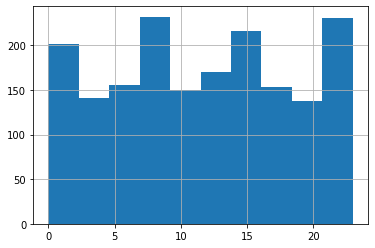

In [22]:
#to represent the hour popularity in a histogram:
df_dts.hour.hist()

In [16]:
#the most popula station is = paris-portedemontrouge-8 
df_dts['ID'].value_counts()


paris-portedemontrouge-8    11
paris-bremontier-19         10
paris-darcet-28             10
paris-adolpheyvon-6          9
paris-taillebourg-2          9
                            ..
paris-nicolastaunay-7        1
paris-richardlenoir-110      1
paris-jeanveber-3            1
paris-saintmartin-243        1
paris-jacquescallot-5        1
Name: ID, Length: 546, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')